## importation des librairies

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import sidetable

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.linear_model import LinearRegression

%matplotlib inline

## Chargement du jeu de données

In [4]:
insurance= pd.read_csv("dataset.csv", sep=",", na_values="nan")
df = insurance.copy()
df.head(5)

age 
 sex 
 bmi 
 children 
 smoker 
 region 
 charges 
 
 
 
 
 0 
 19 
 female 
 27.900 
 0 
 yes 
 southwest 
 16884.92400 
 
 
 1 
 18 
 male 
 33.770 
 1 
 no 
 southeast 
 1725.55230 
 
 
 2 
 28 
 male 
 33.000 
 3 
 no 
 southeast 
 4449.46200 
 
 
 3 
 33 
 male 
 22.705 
 0 
 no 
 northwest 
 21984.47061 
 
 
 4 
 32 
 male 
 28.880 
 0 
 no 
 northwest 
 3866.85520

## description du jeu de données

In [5]:
print(f'Il y a {df.shape[0]} lignes pour {df.shape[1]} colonnes dans ce jeu de données.')

Il y a 1338 lignes pour 7 colonnes dans ce jeu de données.


In [6]:
df.describe(include='all')

age 
 sex 
 bmi 
 children 
 smoker 
 region 
 charges 
 
 
 
 
 count 
 1338.000000 
 1338 
 1338.000000 
 1338.000000 
 1338 
 1338 
 1338.000000 
 
 
 unique 
 NaN 
 2 
 NaN 
 NaN 
 2 
 4 
 NaN 
 
 
 top 
 NaN 
 male 
 NaN 
 NaN 
 no 
 southeast 
 NaN 
 
 
 freq 
 NaN 
 676 
 NaN 
 NaN 
 1064 
 364 
 NaN 
 
 
 mean 
 39.207025 
 NaN 
 30.663397 
 1.094918 
 NaN 
 NaN 
 13270.422265 
 
 
 std 
 14.049960 
 NaN 
 6.098187 
 1.205493 
 NaN 
 NaN 
 12110.011237 
 
 
 min 
 18.000000 
 NaN 
 15.960000 
 0.000000 
 NaN 
 NaN 
 1121.873900 
 
 
 25% 
 27.000000 
 NaN 
 26.296250 
 0.000000 
 NaN 
 NaN 
 4740.287150 
 
 
 50% 
 39.000000 
 NaN 
 30.400000 
 1.000000 
 NaN 
 NaN 
 9382.033000 
 
 
 75% 
 51.000000 
 NaN 
 34.693750 
 2.000000 
 NaN 
 NaN 
 16639.912515 
 
 
 max 
 64.000000 
 NaN 
 53.130000 
 5.000000 
 NaN 
 NaN 
 63770.428010

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

/opt/anaconda3/envs/datalore-user/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/datalore-user/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/datalore-user/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

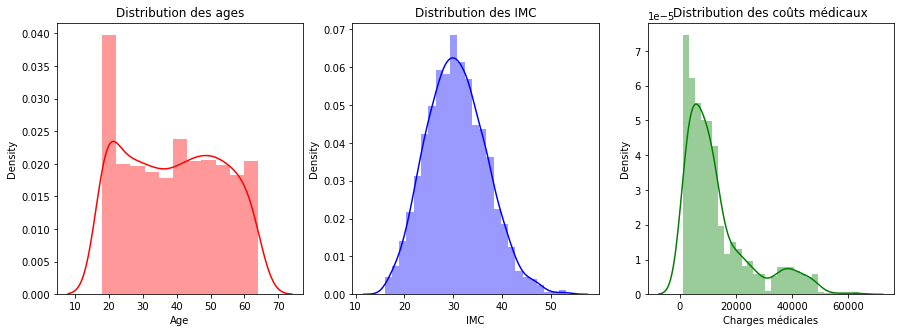

In [10]:
# Visualisation des données numériques - age, bmi, charges sous formes de bar plots

fig = plt.figure(figsize=(15, 5))
plt.subplots_adjust(hspace = 0.6)
sns.set_palette('pastel')
    
plt.subplot(131)
ax1 = sns.distplot(x = df['age'], color = 'r')
plt.xlabel('Age')
plt.title('Distribution des ages')
    
plt.subplot(132)
ax2 = sns.distplot(x = df['bmi'], color = 'b')
plt.xlabel('IMC')
plt.title('Distribution des IMC')
    
plt.subplot(133)
ax3 = sns.distplot(x = df['charges'], color = 'g')
plt.xlabel('Charges médicales')
plt.title('Distribution des coûts médicaux')
    
plt.show()

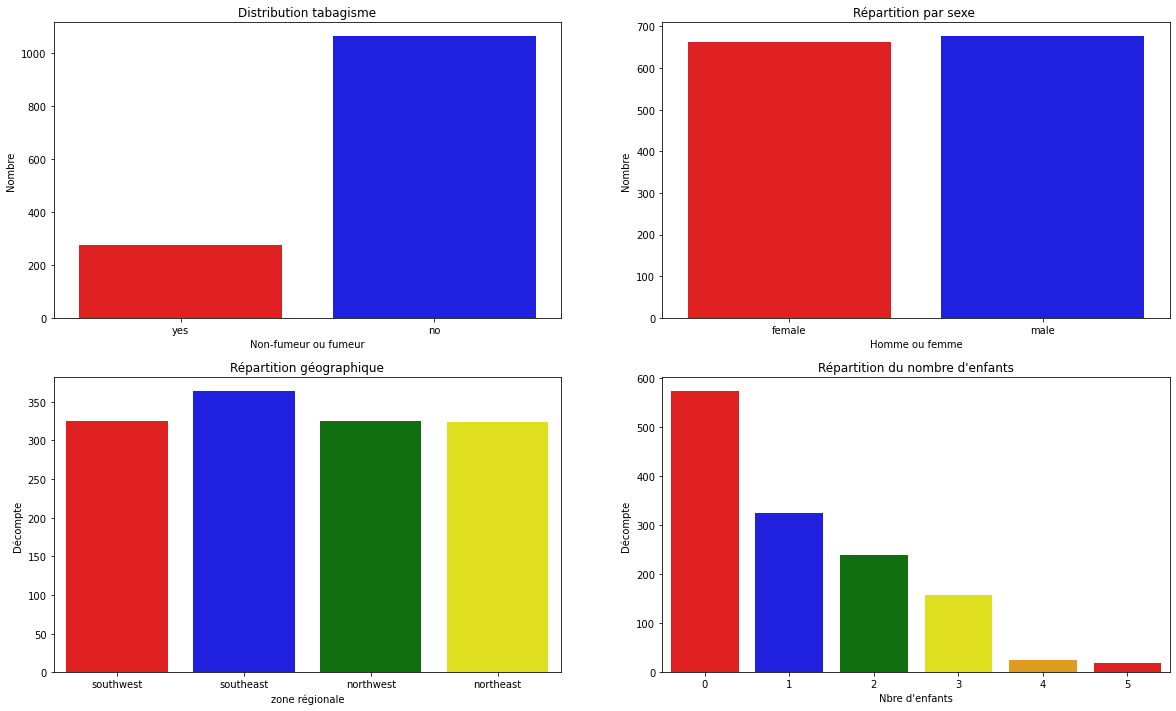

In [11]:
## Graphiques des données catégorielles

# Présentation des données catégorielles en histogramme sous forme de subplot (patchwork)

import matplotlib.pyplot as plt

plt.figure(figsize=(20,25))

couleur = ['red', 'blue', 'green', 'yellow', 'orange']

plt.subplot(4,2,1)
sns.countplot(x = 'smoker', data = df, palette = couleur)
plt.xlabel('Non-fumeur ou fumeur')
plt.ylabel('Nombre ')
plt.title('Distribution tabagisme')


# Répétition du process pour les autres données catégorielles en faisant varier le positionnement du subplot

plt.subplot(4,2,2)

sns.countplot(x = 'sex', data = df, palette = couleur)
plt.xlabel('Homme ou femme')
plt.ylabel('Nombre ')
plt.title('Répartition par sexe ')

plt.subplot(4,2,3)
sns.countplot(x = 'region', data = df, palette = couleur)
plt.xlabel('zone régionale')
plt.ylabel('Décompte ')
plt.title('Répartition géographique')


plt.subplot(4,2,4)
sns.countplot(x = 'children', data = df, palette = couleur)
plt.xlabel('Nbre d\'enfants')
plt.ylabel('Décompte ')
plt.title('Répartition du nombre d\'enfants')


plt.show()

## Analyse statistique de l'impact de la localisation géopgraphique des participants et du nombre d'enfants

In [12]:
a = df.groupby('region').mean()
a

age 
 bmi 
 children 
 charges 
 
 
 region 
 
 
 
 
 
 
 
 
 northeast 
 39.268519 
 29.173503 
 1.046296 
 13406.384516 
 
 
 northwest 
 39.196923 
 29.199785 
 1.147692 
 12417.575374 
 
 
 southeast 
 38.939560 
 33.355989 
 1.049451 
 14735.411438 
 
 
 southwest 
 39.455385 
 30.596615 
 1.141538 
 12346.937377

In [13]:
a = df.groupby('children').mean()
percent_children = df['children'].value_counts(normalize=True)*100
table_children = pd.concat([a, percent_children], axis=1)
table_children

age 
 bmi 
 charges 
 children 
 
 
 
 
 0 
 38.444251 
 30.550296 
 12365.975602 
 42.899851 
 
 
 1 
 39.453704 
 30.623148 
 12731.171832 
 24.215247 
 
 
 2 
 39.445833 
 30.978104 
 15073.563734 
 17.937220 
 
 
 3 
 41.566879 
 30.684331 
 15355.318367 
 11.733931 
 
 
 4 
 39.000000 
 31.391200 
 13850.656311 
 1.868460 
 
 
 5 
 35.611111 
 29.605000 
 8786.035247 
 1.345291

## relations entre données significatives

In [14]:
# Encodage / remplacement des variables catégorielles 

cleanup_nums = {"smoker":  {"yes": 1, "no": 0}, 'sex' : {"female": 0, "male":1}}

df=df.replace('cleanup_nums')
df.head()

age 
 sex 
 bmi 
 children 
 smoker 
 region 
 charges 
 
 
 
 
 0 
 19 
 female 
 27.900 
 0 
 yes 
 southwest 
 16884.92400 
 
 
 1 
 18 
 male 
 33.770 
 1 
 no 
 southeast 
 1725.55230 
 
 
 2 
 28 
 male 
 33.000 
 3 
 no 
 southeast 
 4449.46200 
 
 
 3 
 33 
 male 
 22.705 
 0 
 no 
 northwest 
 21984.47061 
 
 
 4 
 32 
 male 
 28.880 
 0 
 no 
 northwest 
 3866.85520

In [15]:
# retrait des données non-significatives

df= df.drop(['region', 'children'], axis=1) 
df.head()

age 
 sex 
 bmi 
 smoker 
 charges 
 
 
 
 
 0 
 19 
 female 
 27.900 
 yes 
 16884.92400 
 
 
 1 
 18 
 male 
 33.770 
 no 
 1725.55230 
 
 
 2 
 28 
 male 
 33.000 
 no 
 4449.46200 
 
 
 3 
 33 
 male 
 22.705 
 no 
 21984.47061 
 
 
 4 
 32 
 male 
 28.880 
 no 
 3866.85520

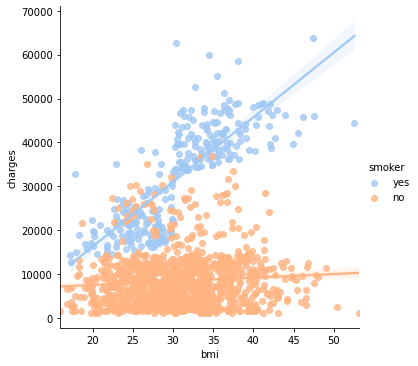

In [16]:
# Relation entre les charges et le bmi en fonction du statut de fumeur

sns.lmplot(x = 'bmi',y = 'charges', hue = 'smoker' , data=df)

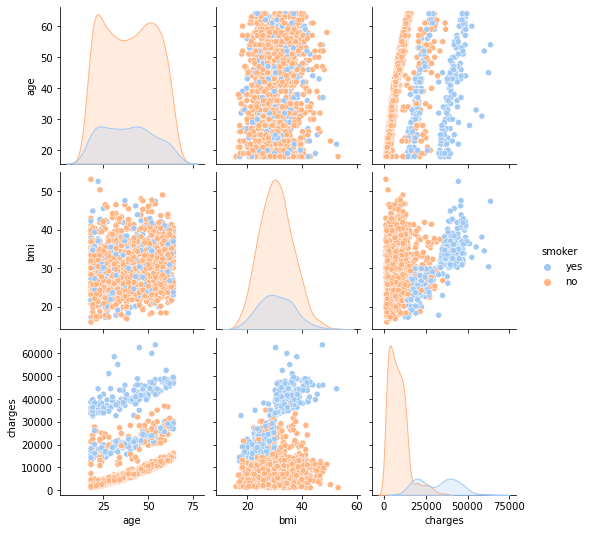

In [17]:
sns.pairplot(data =  df, hue = 'smoker')

## conclusion : les variables 'smoker', 'bmi' sont des variables de segmentation pour la variable 'charges'. 

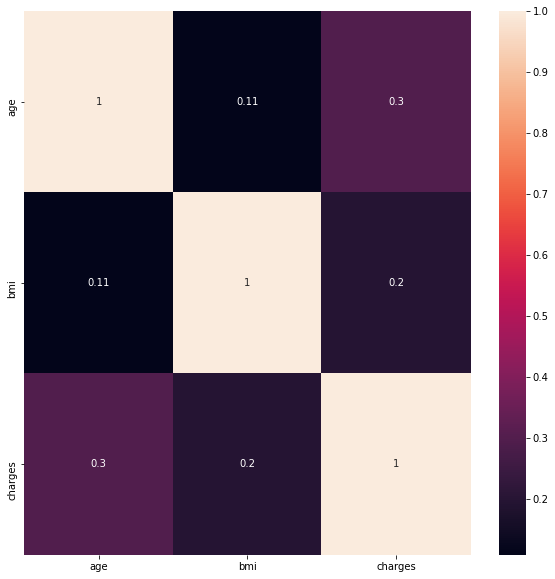

In [18]:
import matplotlib.pyplot as plt

df.corr()

plt.subplots(figsize=(10,10))
sns.heatmap(data = df.corr(), annot=True)

La feature 'smoker' présente le degré de corrélation le plus élevé avec la target, puis l'âge, le bmi et le genre est le feature avec le plus faible degré de corrélation. 
Pour l'analyse par régression linaire multiple, nous utiliserons pour commencer ce même jeu de données

## Backward elimination
On utilise comme premier jeu de données, le dataset contenant les variables 'charges', 'smoker', 'age', 'bmi', 'sex' pour obtenir les métriques résultant d'une analyse de type régression linéaire multiple. Avec une méthode de "backward elimination", chaque variable dont la probabilité de contribution n'atteint pas un certain seuil sera éliminée. Ce critère de sélection est fixer au début de notre analyse et ici à un seuil p = 0,05.

In [102]:
# Régression multiple 4 variables
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
est2.summary()
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(y, y_predicted, squared=False)

ValueError: ValueError: Found input variables with inconsistent numbers of samples: [1338, 268]

In [20]:
# La variable 'sex' n'atteint pas le seuil définie et sera donc retirée 

## Backward elimination : 3 variables

In [101]:
X, y= df[['age', 'bmi', 'smoker']], df['charges']


X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
est2.summary()

OLS Regression Results 
 
 Dep. Variable: charges R-squared: 0.747 
 
 
 Model: OLS Adj. R-squared: 0.747 
 
 
 Method: Least Squares F-statistic: 1316. 
 
 
 Date: Wed, 27 Jan 2021 Prob (F-statistic): 0.00 
 
 
 Time: 07:35:41 Log-Likelihood: -13557. 
 
 
 No. Observations: 1338 AIC: 2.712e+04 
 
 
 Df Residuals: 1334 BIC: 2.714e+04 
 
 
 Df Model: 3 
 
 
 Covariance Type: nonrobust 
 
 
 
 
 coef std err t P>|t| [0.025 0.975] 
 
 
 const -1.168e+04 937.569 -12.454 0.000 -1.35e+04 -9837.561 
 
 
 age 259.5475 11.934 21.748 0.000 236.136 282.959 
 
 
 bmi 322.6151 27.487 11.737 0.000 268.692 376.538 
 
 
 smoker 2.382e+04 412.867 57.703 0.000 2.3e+04 2.46e+04 
 
 
 
 
 Omnibus: 299.709 Durbin-Watson: 2.077 
 
 
 Prob(Omnibus): 0.000 Jarque-Bera (JB): 710.137 
 
 
 Skew: 1.213 Prob(JB): 6.25e-155 
 
 
 Kurtosis: 5.618 Cond. No. 289. 
 
 Notes: [1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

## L'ensemble des variables sont en-dessous du seuil de 0,05. 
Nous allons considérer que les features les plus significatives sont 'smoker', 'bmi', 'age'

## Détermination du modèle le plus performant et identification des variables les plus significatives


('smoker',)


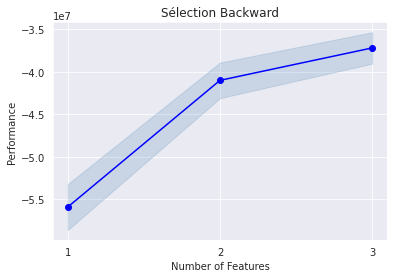

In [96]:
X, y = df[['age', 'bmi', 'smoker']], df['charges']


lr = LinearRegression()

sfs = SFS(lr, 
          k_features=1, 
          forward=False, 
          floating=False, 
          scoring='neg_mean_squared_error',
          cv=10)

sfs = sfs.fit(X, y)
print(sfs.k_feature_names_)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sélection Backward')
plt.grid()

On voit que le modèle le plus approprié est le modèle à trois variables. 

## Détermination des variables les plus significatives

In [113]:
X, y = df[['age', 'bmi', 'smoker']], df['charges']

lr = LinearRegression()

sfs = SFS(lr, 
          k_features=3, 
          forward=False, 
          floating=False, 
          scoring='neg_mean_squared_error',
          cv=10)

sfs = sfs.fit(X, y)
print(sfs.k_feature_names_)

('age', 'bmi', 'smoker')


In [111]:
X, y= df[['age', 'bmi', 'smoker']], df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 0)

# instanciation du modèle
model = LinearRegression()

# entraînement du modèle

model.fit(X_train, y_train)

# Prédiction
y_pred = model.predict(X_test)


# Constitution de l'équation de régression linéaire multiple

"La régression linéaire multiple est : y = {:.3f} * 'age' + {:.3f} * 'bmi' + {:.3f} * 'smoker'+ {:.0f}".format(model.intercept_, model.coef_[0], model.coef_[1], model.coef_[2])

"La régression linéaire multiple est : y = -11571.908 * 'age' + 257.041 * 'bmi' + 321.840 * 'smoker'+ 23625"

# Conclusion

L'équation de la régression linéaire multiple est y = -11571.908 * 'age' + 257.041 'bmi' + 321.840 * 'smoker' + 23625
Le R² est de 0,747

In [47]:
import plotly.figure_factory as ff
import plotly.offline as py
from statsmodels.formula.api import ols as ols
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from scipy import stats
from scipy.stats import ks_2samp, levene, ttest_ind
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [48]:
def check_list_inf_a(list1, val): 
    return(all(x < val for x in list1)) 

In [49]:

class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

In [50]:

def process_linear_regression(data):
    
    alpha = 0.05 # constante pour niveau de test 
    
    #Génération de la formule de régression linéaire
    formula_str = data.columns[-1]+' ~ '+'+'.join(data.columns[:-1])
    
    columns_orig = data.columns[:-1]
    
    #Régression + fit
    reg_multi = ols(formula_str, data=data).fit()
    print(color.BOLD + color.UNDERLINE  + 'Rapport de la régression initiale '+ color.END)
    print(reg_multi.summary())
    
    
    
    print('')
    print('')
    print(color.BOLD + color.UNDERLINE  + 'Identification des observations atypiques et influentes '+ color.END)

    n = data.shape[0]
    p = 3


    #Calcul des leviers
    data['levier'] = reg_multi.get_influence().hat_matrix_diag
    seuil_levier = 2*p/n

    print('')
    print('Seuil levier : '+ str(round(seuil_levier,6)))

    #Calcul des résidus studentisés
    data['rstudent'] = reg_multi.get_influence().resid_studentized_internal
    seuil_rstudent = stats.t.ppf(1-alpha/2,n-p-1)
    print('Seuil résidus studentisés : +-'+ str(round(seuil_rstudent,6)))

    #Calcul de la distance de cook
    data['dcooks'] = reg_multi.get_influence().cooks_distance[0]
    seuil_dcook = 4/(n-p)
    print('Seuil distance de cook : '+ str(round(seuil_dcook,6)))

    #visualisation des observations hors seuil
    data_hors_seuil = data[(data['levier'] > seuil_levier) & ((data['rstudent'] > seuil_rstudent) | (data['rstudent'] < (seuil_rstudent * (-1)))) & (data['dcooks'] > seuil_dcook)].copy()
    nb_obs_atyp_infl = len(data_hors_seuil.index) 

    if nb_obs_atyp_infl == 0 :
        print("Il n'y a pas d'observation atypiques et influentes, on garde les donnée en l'état")
    else:
        print("Il y a ",str(nb_obs_atyp_infl) ," observations atypiques et influentes, \r\nOn les retire et on refait la régression linéaire")
        print('')
        print(color.BOLD  + "Exemple d'observations :" + color.END)
        print('')
        table = ff.create_table(data_hors_seuil.head().round(6), index=True)
        py.iplot(table)
        print('')
        print('')

        #On retire toutes les lignes
        data = data.drop(list(data_hors_seuil.index))

        #Régression + fit
        reg_multi = ols(formula_str, data=data).fit()
        print(color.BOLD + color.UNDERLINE  + 'Rapport de la régression après retrait des observations atypiques et influentes '+ color.END)
        print(reg_multi.summary())
    
    print('')
    print('')
    print(color.BOLD + color.UNDERLINE  + 'Significativité des variables exogènes sélectionnées '+ color.END)
    df_pval = reg_multi.pvalues.round(3).to_frame('p-value')
    df_pval.drop('Intercept',inplace=True)
    df_pval['Significative'] = (df_pval['p-value']<0.05)
    non_signif_exogen = df_pval[df_pval['Significative']==False]
    nb_non_signif_exogen = len(non_signif_exogen.index) 
    
    if nb_non_signif_exogen == 0 :
        print("Il n'y a pas de variable exogène non significative")
    else:
        print("Il y a ",str(nb_non_signif_exogen) ," variable(s) exogène(s) non significative(s), \r\nIl faudrait refaire une régression sans elle(s)")
        print('')
        print(color.BOLD  + "Variables exogènes :" + color.END)
        print('')
        table = ff.create_table(df_pval, index=True)
        py.iplot(table)
        print('')
        print('')

    print('')
    print('')
    print(color.BOLD + color.UNDERLINE  + 'Visualisation des résidus par rapport aux variables '+ color.END)
    
    for c in columns_orig:
        plt.figure(figsize=(8,5))
        plt.title("{} vs. Résidus".format(c),fontsize=16)
        plt.scatter(x=data[c],y=reg_multi.resid,color='blue',edgecolor='k')
        plt.grid(True)
        xmin=min(data[c])
        xmax = max(data[c])
        plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
        plt.xlabel(c,fontsize=14)
        plt.ylabel('Résidus',fontsize=14)
        plt.show()
        
    print("Si les distribution sont aléatoires autour de 0 sur l'axe des abscisses, on peut vérifier l'indépendance et la linéarité des résidus")
    print("Si on discerne des formes, c'est que les erreurs sont en fonction des variables")
    print(' ')
    

    
    print(color.BOLD  + 'Vérification de la colinéarité '+ color.END)
    variables = reg_multi.model.exog
    lst_tmp = [variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]
    
    if(check_list_inf_a(lst_tmp, 10)): 
        print("Tous les coefficients sont inférieurs à 10, il n'y a donc pas de problème de colinéarité")
    else: 
        print("Tous les coefficients ne sont pas inférieurs à 10, il n'y a donc un problème de colinéarité")    
        
    print('')
    print('')    
    print(color.BOLD + color.UNDERLINE  + 'Visualisation des résidus par rapport aux prédictions'+ color.END)
    print('') 
    
    plt.figure(figsize=(8,5))
    p=plt.scatter(x=reg_multi.fittedvalues,y=reg_multi.resid,edgecolor='k')
    xmin=min(reg_multi.fittedvalues)
    xmax = max(reg_multi.fittedvalues)
    plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
    plt.xlabel("Prédictions",fontsize=15)
    plt.ylabel("Résidus",fontsize=15)
    plt.title("Résidus en fonction des prédictions",fontsize=18)
    plt.grid(True)
    plt.show()
    
    print("Si la variance des résidus n'est pas constante par rapport aux prédictions, on observe un non respect de l'homoscédasticité")
    print(' ')
    
    _, pval, __, f_pval = het_breuschpagan(reg_multi.resid, variables)
    
    if pval < alpha:
        test_result = "homoscédasticité non respectée avec un niveau de test de 5%, p-value =" + str(round(pval,4))
    else:
        test_result = "homoscédasticité respectée avec un niveau de test de 5%, p-value =" + str(round(pval,4))
    
    print("Résultat du test Breusch Pagan :\r\n" + test_result) 
    
    print('')
    print('')    
    print(color.BOLD + color.UNDERLINE  + 'Contrôle de la normalité des résidus'+ color.END)
    
    print('')    
    print(color.BOLD  + 'Histogramme'+ color.END)
    print('') 
    plt.figure(figsize=(8,5))
    plt.hist(reg_multi.resid,bins=20,edgecolor='k')
    plt.ylabel('Nombre',fontsize=15)
    plt.xlabel('Résidus',fontsize=15)
    plt.title("Histogramme des résidus",fontsize=18)
    plt.show()
    
    print('')  
    print('')    
    print(color.BOLD  + 'Test de la normalité avec Shapiro'+ color.END)
    print('') 
    _,p=stats.shapiro(reg_multi.resid)
    if p>alpha:
        print("On ne peut pas rejeter l'hypothèse de normalité, p-value = " + str(round(p,4)))
    else:
        print("L'hypothèse de normalité est rejetée, p-value = " + str(round(p,4)))
        
    print('')  
    print('')    
    print(color.BOLD  + 'Test de la normalité avec Kolmogorov-Smirnov'+ color.END)
    print('') 
    _,p= ks_2samp(reg_multi.resid,
                  list(np.random.normal(np.mean(reg_multi.resid),np.std(reg_multi.resid),
                                        n)))
    if p>alpha:
        print("On ne peut pas rejeter l'hypothèse de normalité, p-value = " + str(round(p,4)))
    else:
        print("L'hypothèse de normalité est rejetée, p-value = " + str(round(p,4)))
    
    print('') 
    print('')     
    print(color.BOLD  + 'Diagramme quantile-quantile'+ color.END)
    print('') 
    fig=qqplot(reg_multi.resid,line='45',fit='True')
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.xlabel("Quantiles effectifs",fontsize=15)
    plt.ylabel("Quantiles théoriques",fontsize=15)
    plt.title("Diagramme quantile-quantile des résidus",fontsize=18)
    plt.grid(True)
    plt.show()
          
    return(data_hors_seuil,re

SyntaxError: SyntaxError: unexpected EOF while parsing (<ipython-input-50-539d56190574>, line 195)

In [51]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedKFold, cross_val_score, GridSearchCV
from sklearn.compose import ColumnTransformer,TransformedTargetRegressor
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
#from keras.wrappers.scikit_learn import KerasRegressor

In [52]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import sidetable

%matplotlib inline

In [53]:
df = pd.read_csv("dataset.csv", sep=",", na_values="nan")

In [54]:
X_num = df.select_dtypes(exclude = ['object']).drop(['charges'], axis = 1)
y = df['charges']
X_cat = df.select_dtypes(include = ['object'])
X = pd.concat([X_num, X_cat], axis = 1)


cat_index = df.select_dtypes(include = ['object']).columns

In [55]:
encode = [('cat', OneHotEncoder(drop = 'first'), cat_index)]
cols_transform = ColumnTransformer(transformers = encode)
pipeline = Pipeline(steps = [('trans', cols_transform), ('model', LinearRegression())])
cv = RepeatedKFold(n_splits = 4, n_repeats = 3, random_state = 0)
baseline = cross_val_score(estimator = pipeline, X =X, y = y, scoring = 'r2', cv = cv, n_jobs = -1)

/opt/anaconda3/envs/datalore-user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/opt/anaconda3/envs/datalore-user/lib/python3.7/site-packages/seaborn/_core.py:1303: UserWarning:

Vertical orientation ignored with only `x` specified.



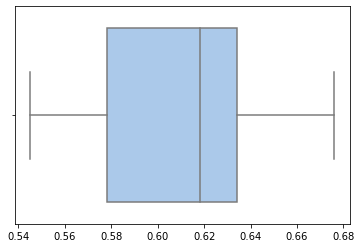

In [56]:
sns.boxplot(baseline, orient = 'v')

In [57]:
X['children'] = X['children'].astype(str)

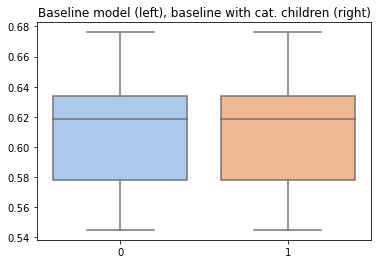

In [58]:
encode = [('cat', OneHotEncoder(drop = 'first'), cat_index)]
cols_transform = ColumnTransformer(transformers = encode)
pipeline = Pipeline(steps = [('trans', cols_transform), ('model', LinearRegression())])
cv = RepeatedKFold(n_splits = 4, n_repeats = 3, random_state = 0)
baseline_child_str = cross_val_score(estimator = pipeline, X =X, y = y, scoring = 'r2', cv = cv, n_jobs = -1)
sns.boxplot(data = [baseline, baseline_child_str], orient = 'v').set_title("Baseline model (left), baseline with cat. children (right)")

In [59]:
baseline_child_str

array([0.66072827, 0.62145947, 0.57905977, 0.59748228, 0.61526983,
       0.63165315, 0.63078126, 0.57559644, 0.54502047, 0.64142536,
       0.55574569, 0.67609158])

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
df = pd.read_csv('dataset.csv', sep=',')

In [62]:
df

age 
 sex 
 bmi 
 children 
 smoker 
 region 
 charges 
 
 
 
 
 0 
 19 
 female 
 27.900 
 0 
 yes 
 southwest 
 16884.92400 
 
 
 1 
 18 
 male 
 33.770 
 1 
 no 
 southeast 
 1725.55230 
 
 
 2 
 28 
 male 
 33.000 
 3 
 no 
 southeast 
 4449.46200 
 
 
 3 
 33 
 male 
 22.705 
 0 
 no 
 northwest 
 21984.47061 
 
 
 4 
 32 
 male 
 28.880 
 0 
 no 
 northwest 
 3866.85520 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 1333 
 50 
 male 
 30.970 
 3 
 no 
 northwest 
 10600.54830 
 
 
 1334 
 18 
 female 
 31.920 
 0 
 no 
 northeast 
 2205.98080 
 
 
 1335 
 18 
 female 
 36.850 
 0 
 no 
 southeast 
 1629.83350 
 
 
 1336 
 21 
 female 
 25.800 
 0 
 no 
 southwest 
 2007.94500 
 
 
 1337 
 61 
 female 
 29.070 
 0 
 yes 
 northwest 
 29141.36030 
 
 
 
 1338 rows × 7 columns

In [63]:
Male = pd.get_dummies(df['sex'], drop_first=True)
df = pd.concat([df, Male], axis=1 )

In [64]:
Smoker = pd.get_dummies(df['smoker'], drop_first=True)
df = pd.concat([df, Smoker], axis=1 )

In [65]:
df = df.rename(columns={'yes':'Smoker'})

In [66]:
df.head()

age 
 sex 
 bmi 
 children 
 smoker 
 region 
 charges 
 male 
 Smoker 
 
 
 
 
 0 
 19 
 female 
 27.900 
 0 
 yes 
 southwest 
 16884.92400 
 0 
 1 
 
 
 1 
 18 
 male 
 33.770 
 1 
 no 
 southeast 
 1725.55230 
 1 
 0 
 
 
 2 
 28 
 male 
 33.000 
 3 
 no 
 southeast 
 4449.46200 
 1 
 0 
 
 
 3 
 33 
 male 
 22.705 
 0 
 no 
 northwest 
 21984.47061 
 1 
 0 
 
 
 4 
 32 
 male 
 28.880 
 0 
 no 
 northwest 
 3866.85520 
 1 
 0

# Analyse de la distribution de notre variable expliquée en fonction des variables catégorielles (sex, smoker, region)

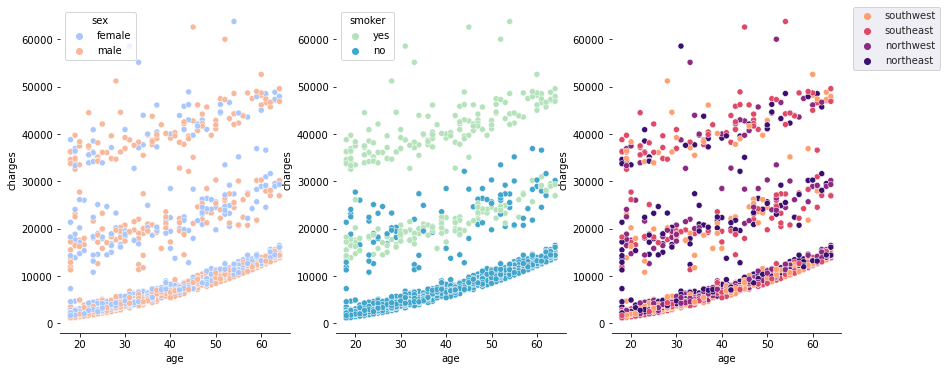

In [67]:
fig, ax =plt.subplots(nrows= 1, ncols = 3, figsize= (14,6))
sns.scatterplot(x='age', y='charges', data = df, palette='coolwarm', hue='sex', ax=ax[0])
sns.scatterplot(x='age', y='charges', data = df, palette='GnBu', hue='smoker', ax=ax[1])
sns.scatterplot(x='age', y='charges', data = df, palette='magma_r', hue='region', ax=ax[2])
sns.set_style('dark')
sns.despine(left=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

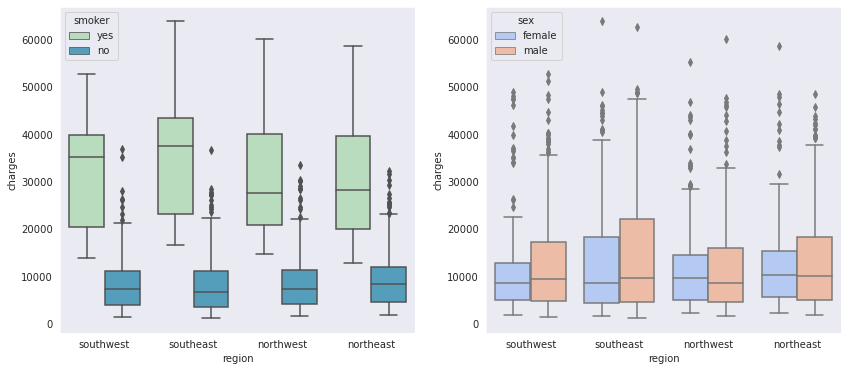

In [68]:
#Répartition des charges en fonction de la région : sex vs smoker

fig, ax =plt.subplots(nrows= 1, ncols = 2, figsize= (14,6))
sns.boxplot(x='region', y='charges', data = df, palette='GnBu', hue='smoker', ax=ax[0])
sns.boxplot(x='region', y='charges', data = df, palette='coolwarm', hue='sex', ax=ax[1])

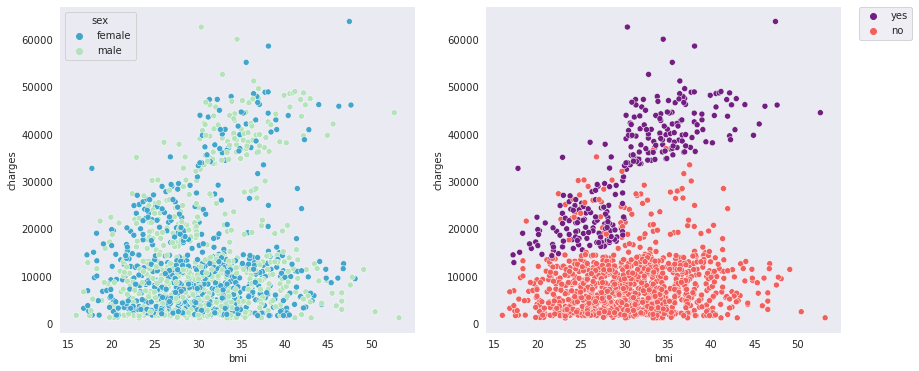

In [69]:
#Répartition des charges en fonction de BMI : sex vs smoker

fig, ax =plt.subplots(nrows= 1, ncols = 2, figsize= (14,6))
sns.scatterplot(x='bmi', y='charges', data = df, palette='GnBu_r', hue='sex', ax=ax[0])
sns.scatterplot(x='bmi', y='charges', data = df, palette='magma', hue='smoker', ax=ax[1])
sns.set_style('dark')
sns.despine(left=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

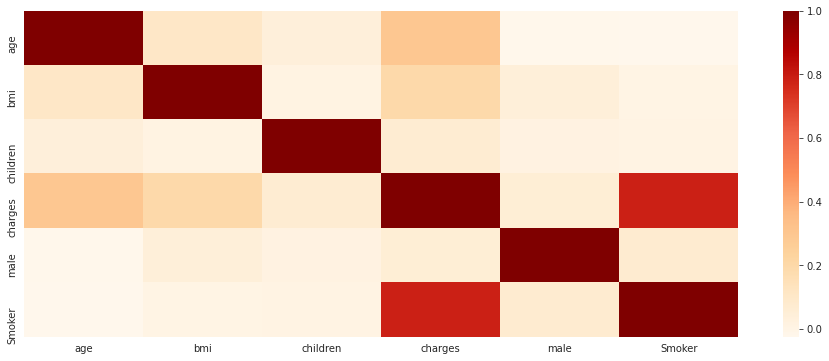

In [70]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(), cmap='OrRd')

# 2. Analyse prédictive

In [71]:
df

age 
 sex 
 bmi 
 children 
 smoker 
 region 
 charges 
 male 
 Smoker 
 
 
 
 
 0 
 19 
 female 
 27.900 
 0 
 yes 
 southwest 
 16884.92400 
 0 
 1 
 
 
 1 
 18 
 male 
 33.770 
 1 
 no 
 southeast 
 1725.55230 
 1 
 0 
 
 
 2 
 28 
 male 
 33.000 
 3 
 no 
 southeast 
 4449.46200 
 1 
 0 
 
 
 3 
 33 
 male 
 22.705 
 0 
 no 
 northwest 
 21984.47061 
 1 
 0 
 
 
 4 
 32 
 male 
 28.880 
 0 
 no 
 northwest 
 3866.85520 
 1 
 0 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 1333 
 50 
 male 
 30.970 
 3 
 no 
 northwest 
 10600.54830 
 1 
 0 
 
 
 1334 
 18 
 female 
 31.920 
 0 
 no 
 northeast 
 2205.98080 
 0 
 0 
 
 
 1335 
 18 
 female 
 36.850 
 0 
 no 
 southeast 
 1629.83350 
 0 
 0 
 
 
 1336 
 21 
 female 
 25.800 
 0 
 no 
 southwest 
 2007.94500 
 0 
 0 
 
 
 1337 
 61 
 female 
 29.070 
 0 
 yes 
 northwest 
 29141.36030 
 0 
 1 
 
 
 
 1338 rows × 9 columns

In [72]:
df.drop(['sex', 'region', 'smoker'], axis=1, inplace=True)

In [73]:
df = df.rename({'male': 'sex', 'Smoker': 'smoker'}, axis=1)

In [74]:
df = df[["age", "sex", "children","bmi", "smoker", "charges"]]

In [75]:
df.head()

age 
 sex 
 children 
 bmi 
 smoker 
 charges 
 
 
 
 
 0 
 19 
 0 
 0 
 27.900 
 1 
 16884.92400 
 
 
 1 
 18 
 1 
 1 
 33.770 
 0 
 1725.55230 
 
 
 2 
 28 
 1 
 3 
 33.000 
 0 
 4449.46200 
 
 
 3 
 33 
 1 
 0 
 22.705 
 0 
 21984.47061 
 
 
 4 
 32 
 1 
 0 
 28.880 
 0 
 3866.85520

In [76]:
X=df.drop('charges', axis=1)
y=df['charges']

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,cross_val_predict, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(X_train)
scaled_x_test = scaler.transform(X_test)

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=300)
rfr.fit(scaled_x_train, y_train)
predict = rfr.predict(scaled_x_test)

In [77]:
def rfr_model(X, y):
# Perform Grid-Search
    gsc = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': range(2,6),
            'n_estimators': (10, 50, 100, 300),
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0,n_jobs=-1)

    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    
    rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],                               random_state=False, verbose=False)
# Perform K-Fold CV
    scores = cross_val_score(rfr, X, y, cv=10, scoring='neg_mean_absolute_error')

    return scores

In [78]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("MAE : ",mean_absolute_error(y_test, predict))
print("MSE : ",np.sqrt(mean_squared_error(y_test, predict)))

NameError: NameError: name 'predict' is not defined

In [79]:


scores = cross_val_score(rfr, X, y, cv=10, scoring='neg_mean_absolute_error')

NameError: NameError: name 'rfr' is not defined

In [80]:
scores

NameError: NameError: name 'scores' is not defined

In [81]:

predictions = cross_val_predict(rfr, X, y, cv=10)

NameError: NameError: name 'cross_val_predict' is not defined

In [82]:
predictions

NameError: NameError: name 'predictions' is not defined

In [83]:
r2score = r2_score(y_test , y_pred)

In [84]:
r2score

0.1480748245924075

In [85]:
rfr_model(X, y)

array([-2447.6094211 , -2572.28313674, -2714.0097428 , -3007.33032971,
       -2686.93792889, -1866.1392544 , -2369.06172137, -2935.61465825,
       -2399.23260834, -2627.07783829])